In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_2.csv')

In [3]:
df.head()

,Name,Roll No.,Merit,total,gpa,no of failed Subject
0,MD. NAGIB MAHAFUZ,1202425010001,424,89,0.00,2
1,MD. SHOYB HASAN,1202425010002,313,97,0.00,2
2,SAZID MAHMUD,1202425010003,100,105,4.25,Passed
3,MD. SAYEED AL JUBAYER,1202425010004,314,97,0.00,2
4,MD. TANJIT MAHBUB,1202425010005,745,0,0.00,6


In [4]:
df[' no of failed Subject'] = df[' no of failed Subject'].replace('Passed', 0)

In [5]:
df['Roll No.'] = df['Roll No.'].apply(lambda x: int(str(x)[10:]))

In [6]:
def section(roll):
    if roll <= 150:
        return 'A'
    elif roll <= 300:
        return 'B'
    elif roll <= 450:
        return 'C'
    elif roll <= 600:
        return 'D'
    elif roll <= 750:
        return 'E'
    else:
        return 'F'
df['Section'] = df['Roll No.'].apply(section)

In [7]:
df.groupby(by = 'Section')[' no of failed Subject'].value_counts()

Section   no of failed Subject
A        2                        38
         1                        29
         0                        25
         6                        24
         3                        18
         4                         8
         5                         4
         7                         2
B        1                        39
         0                        38
         2                        33
         6                        16
         4                         8
         3                         7
         5                         5
         7                         3
C        1                        43
         2                        33
         3                        25
         6                        14
         0                        12
         4                        11
         5                         8
         7                         4
D        1                        31
         0                        29
       

In [8]:
def get_grade(x):
    if x >= 5:
        return 'A+'
    elif x >= 4:
        return 'A'
    elif x >= 3.5:
        return 'A-'
    elif x >= 3:
        return 'B' 
    elif x >= 2:
        return 'C'
    elif x >= 1:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['gpa'].apply(get_grade)

In [9]:
df[' no of failed Subject'] = df[' no of failed Subject'].map(lambda x: int(x))

In [10]:
df.groupby('Section')['Grade'].value_counts()

Section  Grade
A        F        123
         A         19
         A+         4
         A-         2
B        F        111
         A         31
         A-         4
         A+         3
C        F        138
         A          8
         A+         4
D        F        119
         A         20
         A-         6
         A+         3
E        F        125
         A         16
         A+         3
         A-         3
F        F        135
         A          4
         A+         2
Name: count, dtype: int64

In [11]:
df.groupby(by = 'Section')[' no of failed Subject'].value_counts()

Section   no of failed Subject
A        2                        38
         1                        29
         0                        25
         6                        24
         3                        18
         4                         8
         5                         4
         7                         2
B        1                        39
         0                        38
         2                        33
         6                        16
         4                         8
         3                         7
         5                         5
         7                         3
C        1                        43
         2                        33
         3                        25
         6                        14
         0                        12
         4                        11
         5                         8
         7                         4
D        1                        31
         0                        29
       

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   883 non-null    object 
 1   Roll No.               883 non-null    int64  
 2   Merit                  883 non-null    int64  
 3   total                  883 non-null    int64  
 4   gpa                    883 non-null    float64
 5    no of failed Subject  883 non-null    int64  
 6   Section                883 non-null    object 
 7   Grade                  883 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.3+ KB


In [13]:
df.describe()

,Roll No.,Merit,total,gpa,no of failed Subject
count,883.000000,883.000000,883.000000,883.000000,883.000000
mean,446.722537,442.000000,72.260476,0.669626,2.626274
std,258.478382,255.044441,39.575183,1.604822,2.079124
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,221.500000,44.500000,0.000000,1.000000
50%,445.000000,442.000000,89.000000,0.000000,2.000000
75%,668.500000,662.500000,101.000000,0.000000,4.000000
max,897.000000,883.000000,130.000000,5.000000,7.000000


Text(0.5, 1.0, 'No of failed students')

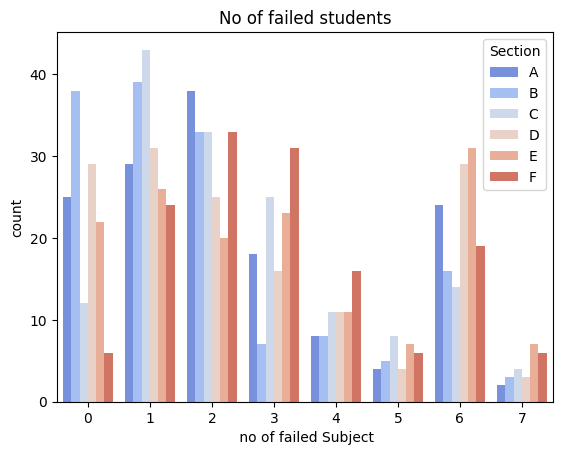

In [14]:
sns.countplot(x = ' no of failed Subject', data = df, hue = 'Section', palette='coolwarm')
plt.title("No of failed students")

<Axes: xlabel='Grade', ylabel='count'>

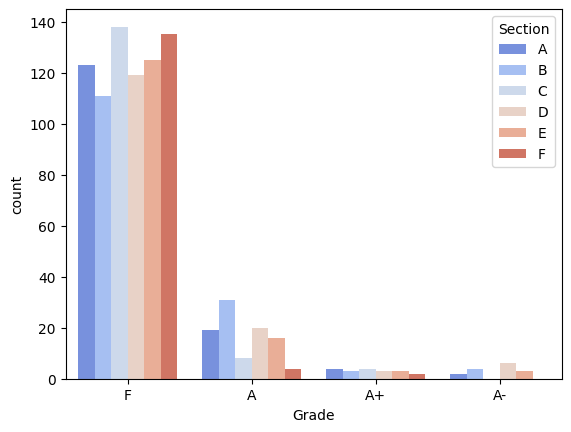

In [15]:
sns.countplot(data=df, x = 'Grade', hue= 'Section', palette='coolwarm')

Text(0.5, 1.0, 'Grade Distribution')

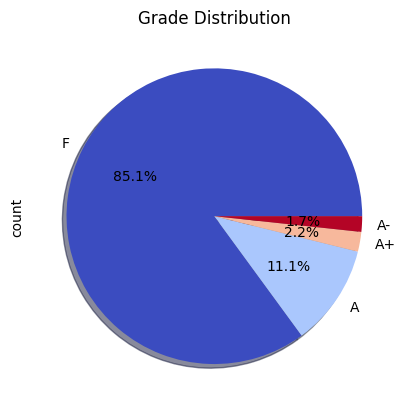

In [16]:
df['Grade'].value_counts().plot(kind = 'pie',shadow = True, colormap= 'coolwarm', autopct='%1.1f%%')
plt.title('Grade Distribution')

<Axes: title={'center': 'Distribution of Failed Subjects per Student (Grade F)'}>

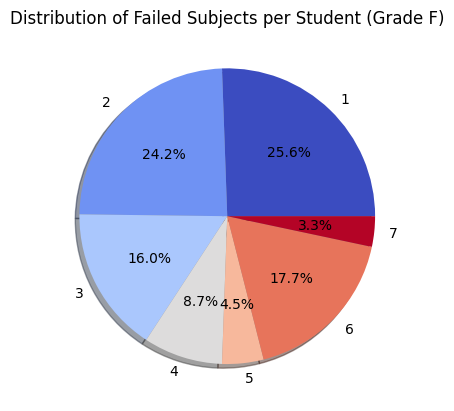

In [17]:
fail_subject_counts = df[df['Grade'] == 'F'][' no of failed Subject'].value_counts().sort_index()

fail_subject_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    shadow=True,
    colormap='coolwarm',
    ylabel='',
    title='Distribution of Failed Subjects per Student (Grade F)'
)

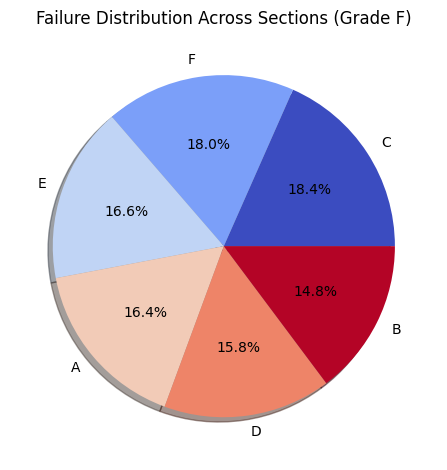

In [18]:
fail_by_section = df[df['Grade'] == 'F']['Section'].value_counts()

fail_by_section.plot(
    kind='pie',
    autopct='%1.1f%%',
    shadow=True,
    colormap='coolwarm',
    ylabel='',
    title='Failure Distribution Across Sections (Grade F)'
)

plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13468\3873233000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Section', y = 'Grade', data = df, palette='coolwarm')


<Axes: xlabel='Section', ylabel='Grade'>

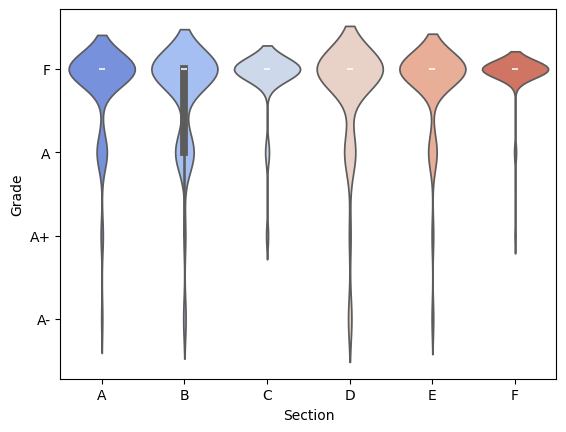

In [19]:
sns.violinplot(x = 'Section', y = 'Grade', data = df, palette='coolwarm')

<Axes: xlabel='gpa', ylabel='Count'>

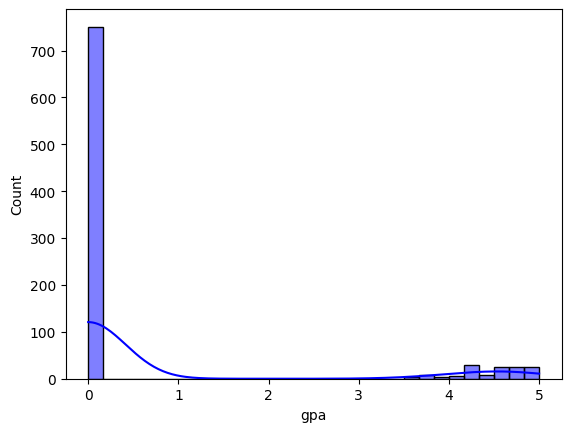

In [20]:
sns.histplot(df['gpa'], bins = 30, kde= True, color= 'Blue')

<Axes: ylabel='gpa'>

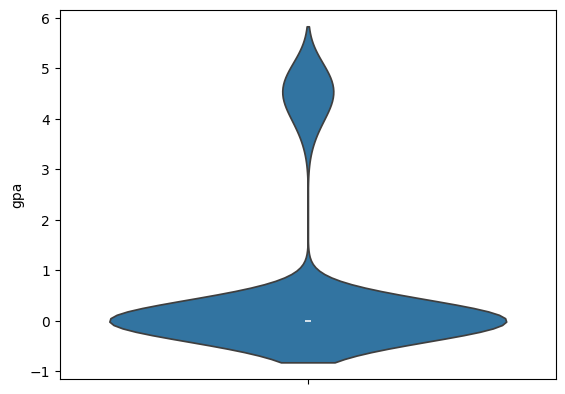

In [21]:
sns.violinplot(y='gpa', data=df)


<Axes: xlabel='total', ylabel='Count'>

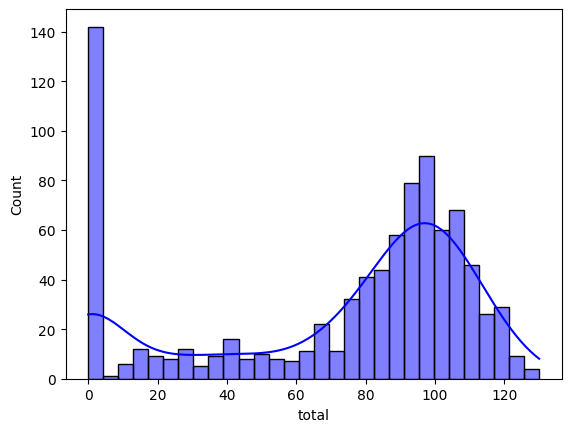

In [22]:
sns.histplot(df['total'], bins = 30, kde = True, color= "Blue")

In [23]:
sum(df['total'] == 0)
# 141 jon exam i dey nai!

141

In [24]:
# Highest mark
print(df['total'].max())

130


<Axes: xlabel=' no of failed Subject', ylabel='Count'>

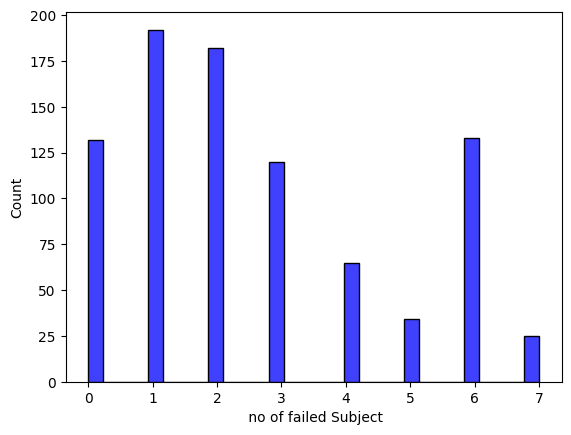

In [25]:
sns.histplot(df[' no of failed Subject'], bins = 30, color= 'Blue')

<Axes: xlabel='Grade', ylabel='count'>

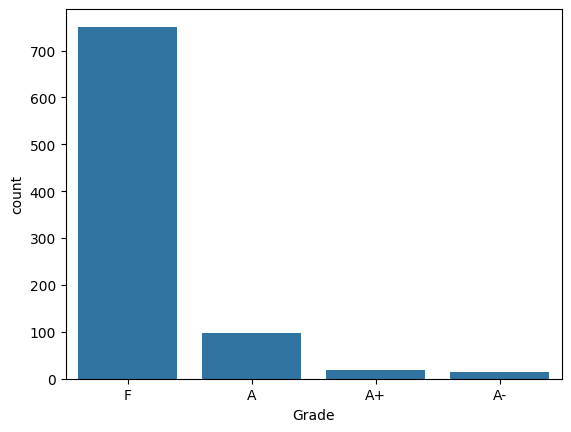

In [26]:
sns.countplot(x='Grade', data=df)


Text(0.5, 1.0, 'Total Marks by Grade')

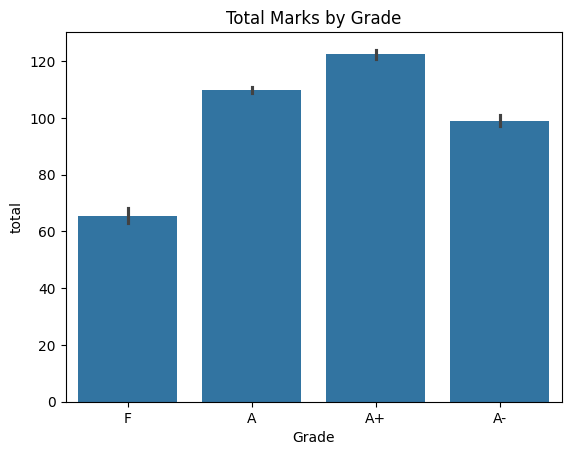

In [27]:
sns.barplot(x='Grade', y='total', data=df)
plt.title('Total Marks by Grade')

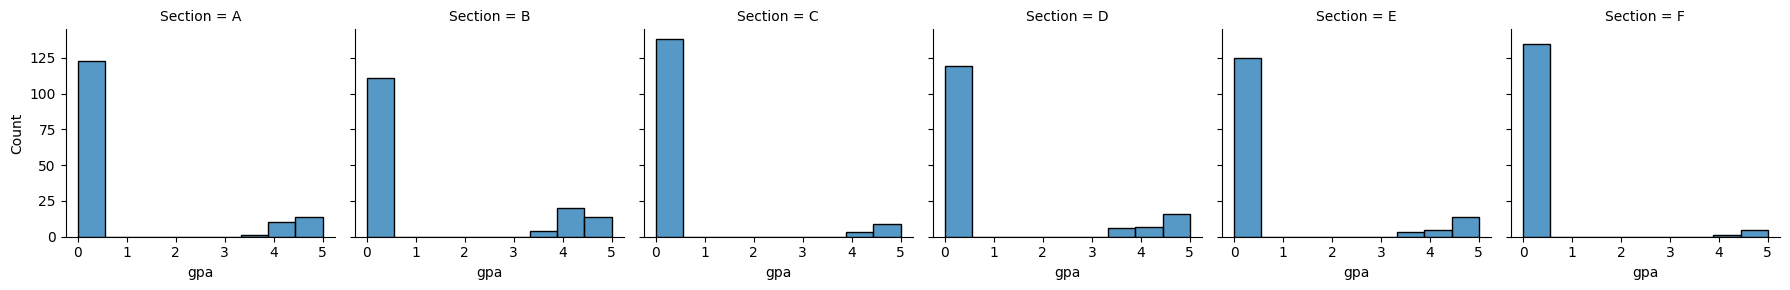

In [28]:
g = sns.FacetGrid(df, col='Section')
g.map(sns.histplot, 'gpa')

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

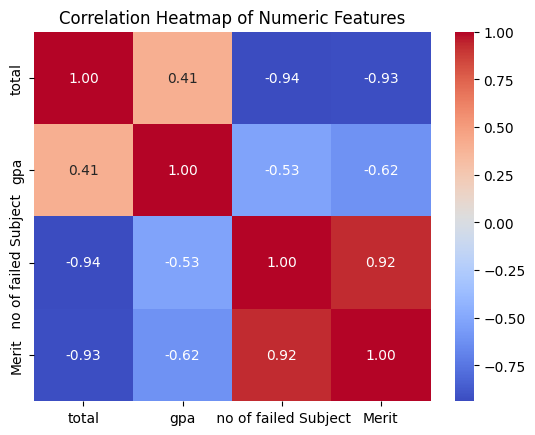

In [29]:
corr = df[['total', 'gpa', ' no of failed Subject', 'Merit']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")

The End